In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # 导入数据
data_path = r'Filtered Dams (UN McGill) 2010-2022 Africa.csv'
data_df = pd.read_csv(data_path)

data_df

,GDW_ID,RES_NAME,DAM_NAME,ALT_NAME,DAM_TYPE,LAKE_CTRL,RIVER,ALT_RIVER,MAIN_BASIN,SUB_BASIN,...,LAT_RIV,LONG_DAM,LAT_DAM,ORIG_SRC,POLY_SRC,GRAND_ID,HYRIV_ID,INSTREAM,HYLAK_ID,HYBAS_L12
0,6861,NaN,Ouldjet Mellegue,Ouldjt Mellegue,Dam,NaN,Mellegue,NaN,NaN,NaN,...,35.977500,NaN,NaN,GRanD,McGill,6878,10004335,Instream,1427721,1.121662e+09
1,6872,NaN,Dikgatlhong,NaN,Dam,NaN,Shashe,Tati,Limpopo,NaN,...,-21.564694,NaN,NaN,GRanD,JRC-GSW,6891,11415033,Instream,1427732,1.121539e+09
2,6895,NaN,Samendeni,NaN,Dam,NaN,Mouhoun,NaN,Black Volta,NaN,...,11.388263,NaN,NaN,GRanD,McGill,6917,10576911,Instream,1427755,1.121935e+09
3,6896,NaN,Soum,NaN,Dam,NaN,Wranko,NaN,Volta,NaN,...,12.597743,NaN,NaN,GRanD,JRC-GSW,6918,10536204,Instream,1427756,1.121917e+09
4,6904,NaN,Imboulou,NaN,Dam,NaN,Lefini,NaN,Congo,NaN,...,-2.935546,NaN,NaN,GRanD,JRC-GSW-mod,6933,11078190,Instream,1427764,1.121209e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,41033,NaN,NaN,NaN,Dam,NaN,NaN,NaN,NaN,NaN,...,-29.743810,NaN,NaN,JRC-GSW,JRC-GSW,0,11502289,Instream,1434044,1.122290e+09
70,41034,NaN,NaN,NaN,Dam,NaN,NaN,NaN,NaN,NaN,...,-29.728842,NaN,NaN,JRC-GSW,JRC-GSW,0,11502107,Offstream,1434045,1.122290e+09
71,41035,NaN,NaN,NaN,Dam,NaN,NaN,NaN,NaN,NaN,...,-29.651161,NaN,NaN,JRC-GSW,JRC-GSW,0,11501708,Instream,1434046,1.122290e+09
72,41050,NaN,NaN,NaN,Dam,NaN,NaN,NaN,NaN,NaN,...,-29.334574,NaN,NaN,JRC-GSW,JRC-GSW,0,11499360,Instream,1434048,1.122289e+09


In [2]:
#过滤出撒哈拉以南非洲的数据

data_df_area_filtered =  data_df[~data_df['COUNTRY'].isin(['Algeria', 'Djibouti', 'Egypt', 'Libya', 'Morocco', 'Somalia', 'Sudan', 'Tunisia'])]

data_df_area_filtered.head(5)

,GDW_ID,RES_NAME,DAM_NAME,ALT_NAME,DAM_TYPE,LAKE_CTRL,RIVER,ALT_RIVER,MAIN_BASIN,SUB_BASIN,...,LAT_RIV,LONG_DAM,LAT_DAM,ORIG_SRC,POLY_SRC,GRAND_ID,HYRIV_ID,INSTREAM,HYLAK_ID,HYBAS_L12
1,6872,NaN,Dikgatlhong,NaN,Dam,NaN,Shashe,Tati,Limpopo,NaN,...,-21.564694,NaN,NaN,GRanD,JRC-GSW,6891,11415033,Instream,1427732,1.121539e+09
2,6895,NaN,Samendeni,NaN,Dam,NaN,Mouhoun,NaN,Black Volta,NaN,...,11.388263,NaN,NaN,GRanD,McGill,6917,10576911,Instream,1427755,1.121935e+09
3,6896,NaN,Soum,NaN,Dam,NaN,Wranko,NaN,Volta,NaN,...,12.597743,NaN,NaN,GRanD,JRC-GSW,6918,10536204,Instream,1427756,1.121917e+09
4,6904,NaN,Imboulou,NaN,Dam,NaN,Lefini,NaN,Congo,NaN,...,-2.935546,NaN,NaN,GRanD,JRC-GSW-mod,6933,11078190,Instream,1427764,1.121209e+09
5,6909,NaN,Gilgel Gibe III,NaN,Dam,NaN,Omo,NaN,Omo,NaN,...,6.851999,NaN,NaN,GRanD,McGill,6940,10772076,Instream,1427769,1.122012e+09


In [3]:
#继续过滤出2014年至2017年时间范围内的数据

data_df_year_filtered =  data_df_area_filtered[data_df_area_filtered['YEAR_DAM'].isin([2014, 2015, 2016, 2017])]
data_df_year_filtered.head(5)

data_df_result = data_df_year_filtered

data_df_result

,GDW_ID,RES_NAME,DAM_NAME,ALT_NAME,DAM_TYPE,LAKE_CTRL,RIVER,ALT_RIVER,MAIN_BASIN,SUB_BASIN,...,LAT_RIV,LONG_DAM,LAT_DAM,ORIG_SRC,POLY_SRC,GRAND_ID,HYRIV_ID,INSTREAM,HYLAK_ID,HYBAS_L12
2,6895,NaN,Samendeni,NaN,Dam,NaN,Mouhoun,NaN,Black Volta,NaN,...,11.388263,NaN,NaN,GRanD,McGill,6917,10576911,Instream,1427755,1.121935e+09
5,6909,NaN,Gilgel Gibe III,NaN,Dam,NaN,Omo,NaN,Omo,NaN,...,6.851999,NaN,NaN,GRanD,McGill,6940,10772076,Instream,1427769,1.122012e+09
6,6910,NaN,Kessem,NaN,Dam,NaN,Kessem,Bulga,Awash,NaN,...,9.151691,NaN,NaN,GRanD,JRC-GSW,6941,10667235,Instream,1427770,1.120853e+09
8,6912,NaN,Tendaho,NaN,Dam,NaN,Awash,NaN,Nile,NaN,...,11.685423,NaN,NaN,GRanD,JRC-GSW,6943,10568177,Instream,1427772,1.120747e+09
13,7141,NaN,Tokwe Mukorsi,NaN,Dam,NaN,Tokwe,NaN,Save,NaN,...,-20.723063,NaN,NaN,GRanD,McGill,7213,11402934,Instream,1428001,1.121526e+09
17,7250,NaN,De Hoop,NaN,Dam,NaN,Steelpoort,NaN,NaN,NaN,...,-24.957948,NaN,NaN,GRanD,JRC-GSW,7342,11460071,Instream,1428110,1.122271e+09
21,7409,NaN,Rib,Ribb,Dam,NaN,Ribb,NaN,Nile,Blue Nile,...,12.031250,NaN,NaN,GRanD,McGill,7365,10554813,Instream,1428193,1.120736e+09
23,7411,NaN,Lom Pangar,NaN,Dam,NaN,Lom,NaN,Sanaga,NaN,...,5.380532,NaN,NaN,GRanD,McGill,7359,10840435,Instream,1428195,1.121002e+09
41,40186,NaN,NaN,NaN,Dam,NaN,NaN,NaN,NaN,NaN,...,14.338011,NaN,NaN,JRC-GSW,JRC-GSW,0,10480682,Instream,1433783,1.121890e+09
42,40188,NaN,NaN,NaN,Dam,NaN,NaN,NaN,NaN,NaN,...,15.189944,NaN,NaN,JRC-GSW,JRC-GSW,0,10456353,Instream,1433785,1.121879e+09


In [4]:
#最后将撒哈拉以南非洲，在2014至2017时间范围内的数据写入到 data_filtered_result.csv 文件

data_df_year_filtered.to_csv("data_filtered_result.csv", index=False, sep=',')


In [70]:
#Read overall data
df = pd.read_csv("subnational_unit_data.csv")
df_cases = df[df['Metric'] == 'Incidence Rate']

df_cases.head(5)

,ISO3,National Unit,Name,Admin Level,Metric,Units,Year,Value
0,COD,Democratic Republic of the Congo,Mongala,admin1,Incidence Rate,Cases per Thousand,2010,498.632671
1,COD,Democratic Republic of the Congo,Mongala,admin1,Incidence Rate,Cases per Thousand,2011,440.216901
2,COD,Democratic Republic of the Congo,Mongala,admin1,Incidence Rate,Cases per Thousand,2012,336.930436
3,COD,Democratic Republic of the Congo,Mongala,admin1,Incidence Rate,Cases per Thousand,2013,243.158971
4,COD,Democratic Republic of the Congo,Mongala,admin1,Incidence Rate,Cases per Thousand,2014,207.724085


In [71]:
# Create and process all data for Damid 6909

df_filtered_6909 = df_cases[(df_cases['Name'] == 'Oromia') | (df_cases['Name'] == 'Dire Dawa')]
# df_filtered = df_filtered_6909[(df_filtered_6909['Year'] >= 2013) & (df_filtered_6909['Year'] <= 2018)]
df_filtered_6909['Treatment'] = df_filtered_6909['Name'].apply(lambda x: 1 if x == 'Oromia' else 0)
df_filtered_6909['Post'] = df_filtered_6909['Year'].apply(lambda x: 1 if x >= 2016 else 0)
df_filtered_6909['Treatment_Post'] = df_filtered_6909['Treatment'] * df_filtered_6909['Post']

save_path_6909 = './df_filtered_6909.csv'
df_filtered_6909.to_csv(save_path_6909, index=False)
print(f"The file has been saved to: {save_path_6909}")

The file has been saved to: ./df_filtered_6909.csv


C:\Users\user\AppData\Local\Temp\ipykernel_46160\1743596010.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_6909['Treatment'] = df_filtered_6909['Name'].apply(lambda x: 1 if x == 'Oromia' else 0)
C:\Users\user\AppData\Local\Temp\ipykernel_46160\1743596010.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_6909['Post'] = df_filtered_6909['Year'].apply(lambda x: 1 if x >= 2016 else 0)
C:\Users\user\AppData\Local\Temp\ipykernel_46160\1743596010.py:7: SettingWithCopyWarning: 
A valu

In [72]:
#Baseline Mean, SD and T-test Damid 6909

import scipy.stats as stats
pre_data_6909 = df_filtered_6909[df_filtered_6909['Year'] <= 2015]
mean_Oromia = pre_data_6909[pre_data_6909['Name'] == 'Oromia']['Value'].mean()
mean_Dire = pre_data_6909[pre_data_6909['Name'] == 'Dire Dawa']['Value'].mean()
std_Oromia = pre_data_6909[pre_data_6909['Name'] == 'Oromia']['Value'].std()
std_Dire = pre_data_6909[pre_data_6909['Name'] == 'Dire Dawa']['Value'].std()
print(f"Oromia Baseline Mean: {mean_Oromia:.2f}, SD: {std_Oromia:.2f}")
print(f"Dire Dawa Baseline Mean: {mean_Dire:.2f}, SD: {std_Dire:.2f}")
t_stat, p_value = stats.ttest_ind(
 pre_data_6909[pre_data_6909['Name'] == 'Oromia']['Value'],
 pre_data_6909[pre_data_6909['Name'] == 'Dire Dawa']['Value']
)
print(f"t-Statistic: {t_stat:.2f}, p value: {p_value:.3f}")

Oromia Baseline Mean: 136.08, SD: 56.92
Dire Dawa Baseline Mean: 148.38, SD: 54.65
t-Statistic: -0.38, p value: 0.711


In [73]:
#DID Damid 6909:
import statsmodels.formula.api as smf

from  statsmodels.iolib.summary2 import summary_col

model_6909 = smf.ols('Value ~ Treatment + Post + Treatment_Post', data=df_filtered_6909).fit()
print(model_6909.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     12.35
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           6.02e-05
Time:                        11:51:21   Log-Likelihood:                -129.90
No. Observations:                  26   AIC:                             267.8
Df Residuals:                      22   BIC:                             272.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        148.3810     15.878      9.

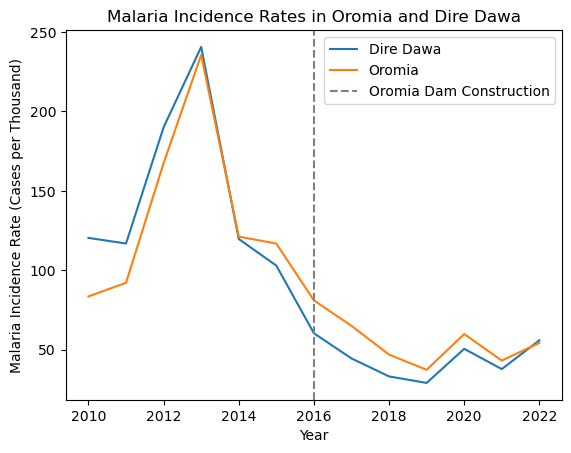

In [74]:
# Visualise Damid 6909
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=df_filtered_6909, x='Year', y='Value', hue='Name', marker='')
plt.axvline(2016, color='gray', linestyle='--', label='Oromia Dam Construction')
plt.title('Malaria Incidence Rates in Oromia and Dire Dawa')
plt.xlabel('Year')
plt.ylabel('Malaria Incidence Rate (Cases per Thousand)')
plt.legend(title='')
plt.show()

# 6909 data analysis:
Oromia v.s Dire Dawa

Oromia Baseline Mean: 136.08, SD: 56.92


Dire Dawa Baseline Mean: 148.38, SD: 54.65


t-Statistic: -0.38, p-value: 0.711


Baseline: No significant difference (p = 0.711).

DID Effect: Treatment_Post coefficient (23.2032, p = 0.456) is not statistically significant.

Conclusion: No significant impact of the dam on malaria incidence rates in Oromia  
compared to Dire Dawa.

In [75]:
# model table summary Damid 6909

models=[] # create empty list to store the models
names=[] # create empty list to store the names of the models

for year_diff in range(1, 10): #
    did=df_cases[(df_cases['Year'] >= (2016-year_diff)) & (df_cases['Year']<=(2016+year_diff)) \
                 & df_cases['Name'].isin(['Oromia', 'Dire Dawa'])] # subset the data within the window of interest around 2016
    did['post']=np.where(did['Year']>=2016,1,0) # create a dummy variable indicating the period after the minimum wage increase
    did['treatment']=np.where(did['Name']=='Oromia',1,0) # create a dummy variable for treatment
    did['post_treatment']=did['post']*did['treatment'] # create an interaction term between the post and treatment variables
    did_model = smf.ols('Value ~ post + treatment + post_treatment', did).fit() # run the difference in difference model

    models.append(did_model) # append the model to the list of models
    names.append('± '+str(year_diff)+' Year') # append the name of the model to the list of names

table= summary_col( # create a regression table
    models, # pass the models to the summary_col function
    stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
    float_format='%0.3f', # set the decimal places to 3
    model_names=names, # set the names of the model
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))}) # add the number of observations to the table

print(table) # print the table


                ± 1 Year  ± 2 Year   ± 3 Year    ± 4 Year    ± 5 Year    ± 6 Year    ± 7 Year    ± 8 Year    ± 9 Year 
----------------------------------------------------------------------------------------------------------------------
Intercept      102.864** 111.253*** 154.386*** 163.295***  153.990***  148.381***  148.381***  148.381***  148.381*** 
               (11.273)  (9.606)    (27.147)   (20.353)    (17.907)    (15.878)    (15.878)    (15.878)    (15.878)   
post           -50.555*  -65.365*** -112.732** -119.885*** -111.536*** -104.018*** -104.018*** -104.018*** -104.018***
               (13.806)  (12.401)   (35.912)   (27.306)    (24.246)    (21.639)    (21.639)    (21.639)    (21.639)   
treatment      13.867    7.682      3.446      -3.057      -7.388      -12.303     -12.303     -12.303     -12.303    
               (15.942)  (13.584)   (38.392)   (28.783)    (25.324)    (22.455)    (22.455)    (22.455)    (22.455)   
post_treatment 6.754     10.650     12.375     

C:\Users\user\AppData\Local\Temp\ipykernel_46160\3184394696.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did['post']=np.where(did['Year']>=2016,1,0) # create a dummy variable indicating the period after the minimum wage increase
C:\Users\user\AppData\Local\Temp\ipykernel_46160\3184394696.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did['treatment']=np.where(did['Name']=='Oromia',1,0) # create a dummy variable for treatment
C:\Users\user\AppData\Local\Temp\ipykernel_46160\3184394696.py:11: Set

In [76]:
df_filtered_6909 = df_filtered_6909[df_filtered_6909['Name'] == 'Oromia']
df_filtered_6909["Year"] -= 2016
df_filtered_6909.head()

C:\Users\user\AppData\Local\Temp\ipykernel_46160\844012302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_6909["Year"] -= 2016


,ISO3,National Unit,Name,Admin Level,Metric,Units,Year,Value,Treatment,Post,Treatment_Post
65832,ETH,Ethiopia,Oromia,admin1,Incidence Rate,Cases per Thousand,-6,83.458179,1,0,0
65833,ETH,Ethiopia,Oromia,admin1,Incidence Rate,Cases per Thousand,-5,92.059185,1,0,0
65834,ETH,Ethiopia,Oromia,admin1,Incidence Rate,Cases per Thousand,-4,167.454967,1,0,0
65835,ETH,Ethiopia,Oromia,admin1,Incidence Rate,Cases per Thousand,-3,235.626885,1,0,0
65836,ETH,Ethiopia,Oromia,admin1,Incidence Rate,Cases per Thousand,-2,121.139123,1,0,0


C:\Users\user\AppData\Local\Temp\ipykernel_46160\778796133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_6909['Name'] = df_filtered_6909['Name'].str.replace('Oromia', 'Oromia (Treatment)')


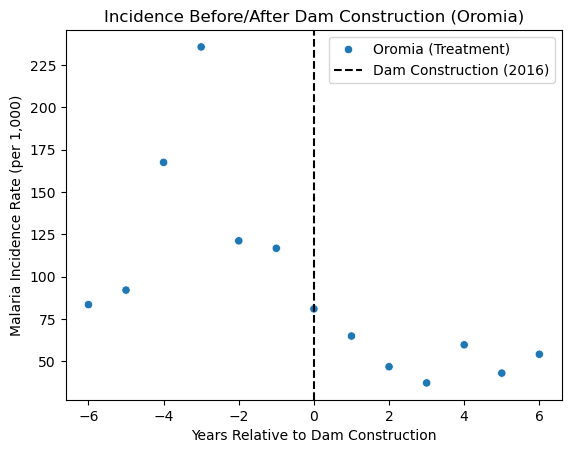

In [77]:
df_filtered_6909['Name'] = df_filtered_6909['Name'].str.replace('Oromia', 'Oromia (Treatment)')
sns.scatterplot(data=df_filtered_6909, x='Year', y='Value', hue='Name')
plt.axvline(0, color='black', linestyle='--', label='Dam Construction (2016)')
plt.title("Incidence Before/After Dam Construction (Oromia)");
plt.xlabel('Years Relative to Dam Construction')
plt.ylabel('Malaria Incidence Rate (per 1,000)')
plt.legend(title='')
plt.show()

In [78]:
rdd_df = df_filtered_6909.assign(threshold=(df_filtered_6909["Year"] > 0).astype(int))
model = smf.wls("Value ~ Year * threshold ", rdd_df).fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.500
Model:                            WLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     2.994
Date:                Mon, 20 Jan 2025   Prob (F-statistic):             0.0881
Time:                        11:51:46   Log-Likelihood:                -65.925
No. Observations:                  13   AIC:                             139.8
Df Residuals:                       9   BIC:                             142.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        127.7173     31.577      4.

c:\Users\user\anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


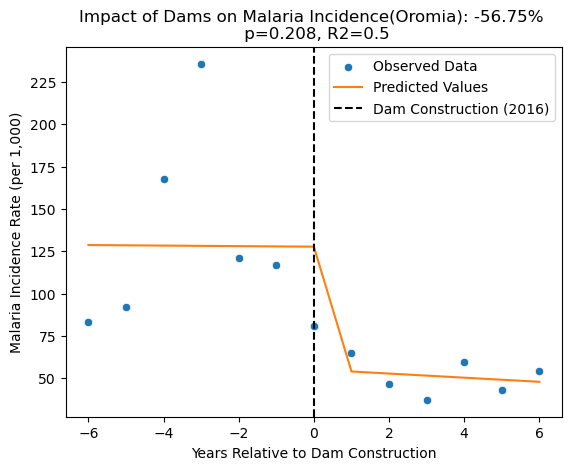

In [79]:
ate_pct = 100*((model.params["threshold"] + model.params["Intercept"])/model.params["Intercept"] - 1)

# ax = df_filtered_6909.plot.scatter(x="Year", y="Value", color="C0")
ax = sns.scatterplot(data=df_filtered_6909, x='Year', y='Value', label='Observed Data')
df_filtered_6909.assign(predictions=model.fittedvalues).plot(x="Year", y="predictions", ax=ax, color="C1", label='Predicted Values')
plt.axvline(0, color='black', linestyle='--', label='Dam Construction (2016)')
plt.title(f"Impact of Dams on Malaria Incidence(Oromia): {np.round(ate_pct, 2)}% \n p={np.round(model.pvalues['threshold'], 3)}, R2={np.round(model.rsquared, 3)}")
plt.xlabel('Years Relative to Dam Construction')
plt.ylabel('Malaria Incidence Rate (per 1,000)')
plt.legend(title='')
plt.show()

In [80]:
# Create and process all data for Damid 6910

df_filtered_6910 = df_cases[(df_cases['Name'] == 'Oromia') | (df_cases['Name'] == 'Harari')]
# df_filtered = df_filtered_6910[(df_filtered_6909['Year'] >= 2013) & (df_filtered_6909['Year'] <= 2018)]
df_filtered_6910['Treatment'] = df_filtered_6910['Name'].apply(lambda x: 1 if x == 'Oromia' else 0)
df_filtered_6910['Post'] = df_filtered_6910['Year'].apply(lambda x: 1 if x >= 2015 else 0)
df_filtered_6910['Treatment_Post'] = df_filtered_6910['Treatment'] * df_filtered_6910['Post']

df_filtered_6910_path = './df_filtered_6910.csv'
df_filtered_6910.to_csv(df_filtered_6910_path, index=False)
print(f"The file has been saved to: {df_filtered_6910_path}")

The file has been saved to: ./df_filtered_6910.csv


C:\Users\user\AppData\Local\Temp\ipykernel_46160\4211531062.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_6910['Treatment'] = df_filtered_6910['Name'].apply(lambda x: 1 if x == 'Oromia' else 0)
C:\Users\user\AppData\Local\Temp\ipykernel_46160\4211531062.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_6910['Post'] = df_filtered_6910['Year'].apply(lambda x: 1 if x >= 2015 else 0)
C:\Users\user\AppData\Local\Temp\ipykernel_46160\4211531062.py:7: SettingWithCopyWarning: 
A valu

In [81]:
#Baseline Mean, SD and T-test Damid 6910

import scipy.stats as stats
pre_data_6910 = df_filtered_6910[df_filtered_6910['Year'] <= 2014]
mean_Oromia = pre_data_6910[pre_data_6910['Name'] == 'Oromia']['Value'].mean()
mean_Harari = pre_data_6910[pre_data_6910['Name'] == 'Harari']['Value'].mean()
std_Oromia = pre_data_6910[pre_data_6910['Name'] == 'Oromia']['Value'].std()
std_Harari = pre_data_6910[pre_data_6910['Name'] == 'Harari']['Value'].std()
print(f"Oromia Baseline Mean: {mean_Oromia:.2f}, SD: {std_Oromia:.2f}")
print(f"Harari Baseline Mean: {mean_Harari:.2f}, SD: {std_Harari:.2f}")
t_stat, p_value = stats.ttest_ind(
 pre_data_6910[pre_data_6910['Name'] == 'Oromia']['Value'],
 pre_data_6910[pre_data_6910['Name'] == 'Harari']['Value']
)
print(f"t-Statistic: {t_stat:.2f}, p-value: {p_value:.3f}")

Oromia Baseline Mean: 139.95, SD: 62.75
Harari Baseline Mean: 157.04, SD: 54.75
t-Statistic: -0.46, p-value: 0.659


In [82]:
#DID Damid 6910:
import statsmodels.formula.api as smf
model_6910 = smf.ols('Value ~ Treatment + Post + Treatment_Post', data=df_filtered_6910).fit()
print(model_6910.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     11.64
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           8.95e-05
Time:                        11:52:02   Log-Likelihood:                -130.79
No. Observations:                  26   AIC:                             269.6
Df Residuals:                      22   BIC:                             274.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        157.0356     17.998      8.

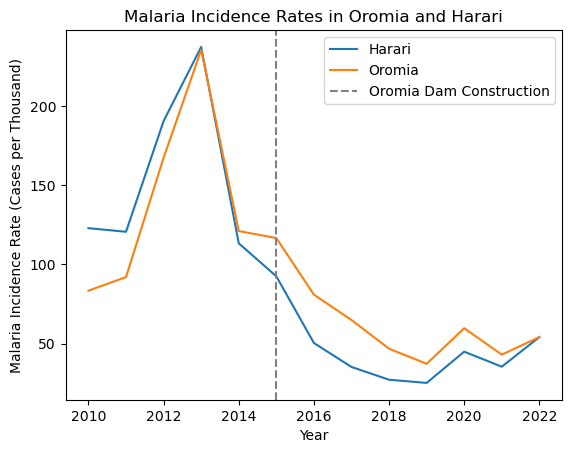

In [83]:
# Visualise Damid 6910
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=df_filtered_6910, x='Year', y='Value', hue='Name', marker='')
plt.axvline(2015, color='gray', linestyle='--', label='Oromia Dam Construction')
plt.title('Malaria Incidence Rates in Oromia and Harari')
plt.xlabel('Year')
plt.ylabel('Malaria Incidence Rate (Cases per Thousand)')
plt.legend(title='')
plt.show()

# 6910 data analysis:
Oromia v.s Harari

Oromia Baseline Mean: 139.95, SD: 62.75


Amhara Baseline Mean: 157.04, SD: 54.75


t-Statistic: -0.46, p-value: 0.659


Baseline: No significant difference (p = 0.659).

DID Effect: Treatment_Post coefficient (34.4145, p = 0.300) is not statistically significant.

Conclusion: No significant impact of the dam on malaria incidence rates in Oromia  
compared to Harari.

In [84]:
# model table summary Damid 6910

models=[] # create empty list to store the models
names=[] # create empty list to store the names of the models

for year_diff in range(1, 10): 
    did=df_cases[(df_cases['Year'] >= (2015-year_diff)) & (df_cases['Year']<=(2015+year_diff)) \
                 & df_cases['Name'].isin(['Oromia', 'Harari'])] # subset the data within the window of interest around 2015
    did['post']=np.where(did['Year']>=2015,1,0) # create a dummy variable indicating the period after the minimum wage increase
    did['treatment']=np.where(did['Name']=='Oromia',1,0) # create a dummy variable for treatment
    did['post_treatment']=did['post']*did['treatment'] # create an interaction term between the post and treatment variables
    did_model = smf.ols('Value ~ post + treatment + post_treatment', did).fit() # run the difference in difference model

    models.append(did_model) # append the model to the list of models
    names.append('± '+str(year_diff)+' Year') # append the name of the model to the list of names

table= summary_col( # create a regression table
    models, # pass the models to the summary_col function
    stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
    float_format='%0.3f', # set the decimal places to 3
    model_names=names, # set the names of the model
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))}) # add the number of observations to the table

print(table) # print the table


               ± 1 Year  ± 2 Year    ± 3 Year    ± 4 Year    ± 5 Year    ± 6 Year    ± 7 Year    ± 8 Year    ± 9 Year 
----------------------------------------------------------------------------------------------------------------------
Intercept      113.406* 175.450*** 180.516***  165.558***  157.036***  157.036***  157.036***  157.036***  157.036*** 
               (27.643) (38.104)   (25.612)    (22.884)    (19.677)    (18.831)    (17.998)    (17.998)    (17.998)   
post           -41.941  -116.060*  -129.178*** -119.456*** -111.132*** -112.629*** -111.415*** -111.415*** -111.415***
               (33.855) (49.192)   (33.881)    (30.702)    (26.642)    (24.656)    (22.943)    (22.943)    (22.943)   
treatment      7.733    2.933      -5.776      -11.488     -17.088     -17.088     -17.088     -17.088     -17.088    
               (39.093) (53.887)   (36.220)    (32.363)    (27.827)    (26.631)    (25.453)    (25.453)    (25.453)   
post_treatment 19.639   25.208     31.785      

C:\Users\user\AppData\Local\Temp\ipykernel_46160\3547450302.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did['post']=np.where(did['Year']>=2015,1,0) # create a dummy variable indicating the period after the minimum wage increase
C:\Users\user\AppData\Local\Temp\ipykernel_46160\3547450302.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did['treatment']=np.where(did['Name']=='Oromia',1,0) # create a dummy variable for treatment
C:\Users\user\AppData\Local\Temp\ipykernel_46160\3547450302.py:11: Set

In [85]:
df_filtered_6910 = df_filtered_6910[df_filtered_6910['Name'] == 'Oromia']
df_filtered_6910["Year"] -= 2015
df_filtered_6910.head()

C:\Users\user\AppData\Local\Temp\ipykernel_46160\857310472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_6910["Year"] -= 2015


,ISO3,National Unit,Name,Admin Level,Metric,Units,Year,Value,Treatment,Post,Treatment_Post
65832,ETH,Ethiopia,Oromia,admin1,Incidence Rate,Cases per Thousand,-5,83.458179,1,0,0
65833,ETH,Ethiopia,Oromia,admin1,Incidence Rate,Cases per Thousand,-4,92.059185,1,0,0
65834,ETH,Ethiopia,Oromia,admin1,Incidence Rate,Cases per Thousand,-3,167.454967,1,0,0
65835,ETH,Ethiopia,Oromia,admin1,Incidence Rate,Cases per Thousand,-2,235.626885,1,0,0
65836,ETH,Ethiopia,Oromia,admin1,Incidence Rate,Cases per Thousand,-1,121.139123,1,0,0


C:\Users\user\AppData\Local\Temp\ipykernel_46160\690529703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_6910['Name'] = df_filtered_6910['Name'].str.replace('Oromia', 'Oromia (Treatment)')


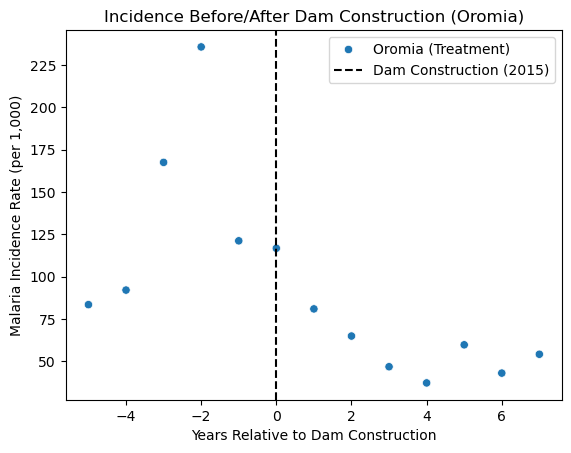

In [86]:
df_filtered_6910['Name'] = df_filtered_6910['Name'].str.replace('Oromia', 'Oromia (Treatment)')
sns.scatterplot(data=df_filtered_6910, x='Year', y='Value', hue='Name')
plt.axvline(0, color='black', linestyle='--', label='Dam Construction (2015)')
plt.title("Incidence Before/After Dam Construction (Oromia)");
plt.xlabel('Years Relative to Dam Construction')
plt.ylabel('Malaria Incidence Rate (per 1,000)')
plt.legend(title='')
plt.show()

In [87]:
rdd_df = df_filtered_6910.assign(threshold=(df_filtered_6910["Year"] > 0).astype(int))
model = smf.wls("Value ~ Year * threshold ", rdd_df).fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.596
Model:                            WLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     4.428
Date:                Mon, 20 Jan 2025   Prob (F-statistic):             0.0358
Time:                        11:52:30   Log-Likelihood:                -64.531
No. Observations:                  13   AIC:                             137.1
Df Residuals:                       9   BIC:                             139.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        159.0623     30.130      5.

c:\Users\user\anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


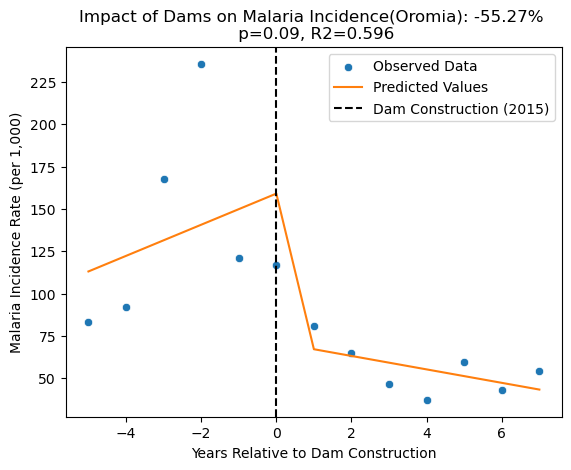

In [88]:
ate_pct = 100*((model.params["threshold"] + model.params["Intercept"])/model.params["Intercept"] - 1)
ax = sns.scatterplot(data=df_filtered_6910, x='Year', y='Value', label='Observed Data')
df_filtered_6910.assign(predictions=model.fittedvalues).plot(x="Year", y="predictions", ax=ax, color="C1", label='Predicted Values')
plt.axvline(0, color='black', linestyle='--', label='Dam Construction (2015)')
plt.title(f"Impact of Dams on Malaria Incidence(Oromia): {np.round(ate_pct, 2)}% \n p={np.round(model.pvalues['threshold'], 3)}, R2={np.round(model.rsquared, 3)}")
plt.xlabel('Years Relative to Dam Construction')
plt.ylabel('Malaria Incidence Rate (per 1,000)')
plt.legend(title='')
plt.show()

In [89]:
# Create and process all data for Damid 7141

df_filtered_7141 = df_cases[(df_cases['Name'] == 'Masvingo') | (df_cases['Name'] == 'Midlands')]
# df_filtered = df_filtered_6910[(df_filtered_7141['Year'] >= 2013) & (df_filtered_6909['Year'] <= 2018)]
df_filtered_7141['Treatment'] = df_filtered_7141['Name'].apply(lambda x: 1 if x == 'Masvingo' else 0)
df_filtered_7141['Post'] = df_filtered_7141['Year'].apply(lambda x: 1 if x >= 2015 else 0)
df_filtered_7141['Treatment_Post'] = df_filtered_7141['Treatment'] * df_filtered_7141['Post']

df_filtered_7141_path = './df_filtered_7141.csv'
df_filtered_7141.to_csv(df_filtered_7141_path, index=False)
print(f"The file has been saved to: {df_filtered_7141_path}")

The file has been saved to: ./df_filtered_7141.csv


C:\Users\user\AppData\Local\Temp\ipykernel_46160\2629709441.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_7141['Treatment'] = df_filtered_7141['Name'].apply(lambda x: 1 if x == 'Masvingo' else 0)
C:\Users\user\AppData\Local\Temp\ipykernel_46160\2629709441.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_7141['Post'] = df_filtered_7141['Year'].apply(lambda x: 1 if x >= 2015 else 0)
C:\Users\user\AppData\Local\Temp\ipykernel_46160\2629709441.py:7: SettingWithCopyWarning: 
A va

In [90]:
#Baseline Mean, SD and T-test Damid 7141

import scipy.stats as stats
pre_data_7141 = df_filtered_7141[df_filtered_7141['Year'] <= 2014]
mean_Masvingo = pre_data_7141[pre_data_7141['Name'] == 'Masvingo']['Value'].mean()
mean_Midlands = pre_data_7141[pre_data_7141['Name'] == 'Midlands']['Value'].mean()
std_Masvingo = pre_data_7141[pre_data_7141['Name'] == 'Masvingo']['Value'].std()
std_Midlands = pre_data_7141[pre_data_7141['Name'] == 'Midlands']['Value'].std()
print(f"Masvingo Baseline Mean: {mean_Masvingo:.2f}, SD: {std_Masvingo:.2f}")
print(f"Midlands Baseline Mean: {mean_Midlands:.2f}, SD: {std_Midlands:.2f}")
t_stat, p_value = stats.ttest_ind(
 pre_data_7141[pre_data_7141['Name'] == 'Masvingo']['Value'],
 pre_data_7141[pre_data_7141['Name'] == 'Midlands']['Value']
)
print(f"t-Statistic: {t_stat:.2f}, p-value: {p_value:.3f}")

Masvingo Baseline Mean: 132.90, SD: 30.48
Midlands Baseline Mean: 163.86, SD: 33.90
t-Statistic: -1.52, p-value: 0.167


In [91]:
#DID Damid 7141:
import statsmodels.formula.api as smf
model_7141 = smf.ols('Value ~ Treatment + Post + Treatment_Post', data=df_filtered_7141).fit()
print(model_7141.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     2.999
Date:                Mon, 20 Jan 2025   Prob (F-statistic):             0.0525
Time:                        11:52:44   Log-Likelihood:                -129.03
No. Observations:                  26   AIC:                             266.1
Df Residuals:                      22   BIC:                             271.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        163.8612     16.818      9.

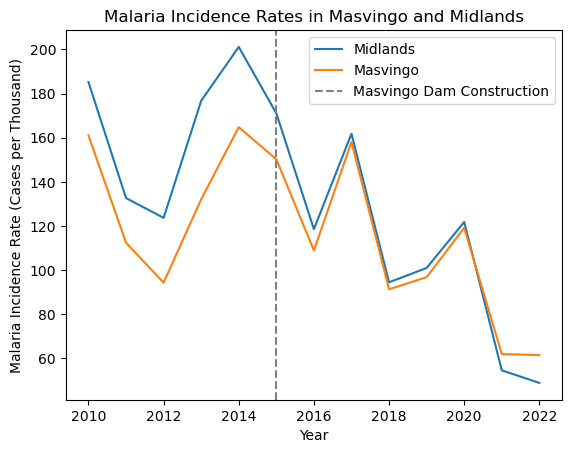

In [92]:
# Visualise Damid 7141
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=df_filtered_7141, x='Year', y='Value', hue='Name', marker='')
plt.axvline(2015, color='gray', linestyle='--', label='Masvingo Dam Construction')
plt.title('Malaria Incidence Rates in Masvingo and Midlands')
plt.xlabel('Year')
plt.ylabel('Malaria Incidence Rate (Cases per Thousand)')
plt.legend(title='')
plt.show()

# 7141 data analysis:
Masvingo v.s Midlands

Masvingo Baseline Mean: 132.90, SD: 30.48


Midlands Baseline Mean: 163.86, SD: 33.90


t-Statistic: -1.52, p-value: 0.167


Baseline: No significant difference (p = 0.167).

DID Effect: Treatment_Post coefficient (27.9264, p = 0.367) is not statistically significant.

Conclusion: No significant impact of the dam on malaria incidence rates in Masvingo   
compared to Midlands.

In [93]:
# model table summary Damid 7141

models=[] # create empty list to store the models
names=[] # create empty list to store the names of the models

for year_diff in range(1, 10): 
    did=df_cases[(df_cases['Year'] >= (2015-year_diff)) & (df_cases['Year']<=(2015+year_diff))\
                  & df_cases['Name'].isin(['Masvingo', 'Midlands'])] # subset the data within the window of interest around 2015
    did['post']=np.where(did['Year']>=2015,1,0) # create a dummy variable indicating the period after the minimum wage increase
    did['treatment']=np.where(did['Name']=='Masvingo',1,0) # create a dummy variable for treatment
    did['post_treatment']=did['post']*did['treatment'] # create an interaction term between the post and treatment variables
    did_model = smf.ols('Value ~ post + treatment + post_treatment', did).fit() # run the difference in difference model

    models.append(did_model) # append the model to the list of models
    names.append('± '+str(year_diff)+' Year') # append the name of the model to the list of names

table= summary_col( # create a regression table
    models, # pass the models to the summary_col function
    stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
    float_format='%0.3f', # set the decimal places to 3
    model_names=names, # set the names of the model
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))}) # add the number of observations to the table

print(table) # print the table


                ± 1 Year  ± 2 Year   ± 3 Year   ± 4 Year   ± 5 Year   ± 6 Year   ± 7 Year   ± 8 Year   ± 9 Year 
----------------------------------------------------------------------------------------------------------------
Intercept      201.104** 188.903*** 167.163*** 158.526*** 163.861*** 163.861*** 163.861*** 163.861*** 163.861***
               (33.388)  (17.783)   (20.525)   (16.647)   (13.795)   (15.722)   (16.818)   (16.818)   (16.818)  
post           -56.319   -38.457    -30.710    -29.171    -35.767*   -46.267**  -54.856**  -54.856**  -54.856** 
               (40.891)  (22.958)   (27.152)   (22.335)   (18.679)   (20.585)   (21.438)   (21.438)   (21.438)  
treatment      -36.351   -40.498    -36.791    -32.653    -30.959    -30.959    -30.959    -30.959    -30.959   
               (47.217)  (25.149)   (29.027)   (23.543)   (19.509)   (22.234)   (23.784)   (23.784)   (23.784)  
post_treatment 21.101    29.083     27.443     24.337     23.589     25.693     27.926     27.9

C:\Users\user\AppData\Local\Temp\ipykernel_46160\199608414.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did['post']=np.where(did['Year']>=2015,1,0) # create a dummy variable indicating the period after the minimum wage increase
C:\Users\user\AppData\Local\Temp\ipykernel_46160\199608414.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did['treatment']=np.where(did['Name']=='Masvingo',1,0) # create a dummy variable for treatment
C:\Users\user\AppData\Local\Temp\ipykernel_46160\199608414.py:11: Sett

In [94]:
df_filtered_7141 = df_filtered_7141[df_filtered_7141['Name'] == 'Masvingo']
df_filtered_7141["Year"] -= 2015
df_filtered_7141.head()

C:\Users\user\AppData\Local\Temp\ipykernel_46160\2438738902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_7141["Year"] -= 2015


,ISO3,National Unit,Name,Admin Level,Metric,Units,Year,Value,Treatment,Post,Treatment_Post
39273,ZWE,Zimbabwe,Masvingo,admin1,Incidence Rate,Cases per Thousand,-5,161.016955,1,0,0
39274,ZWE,Zimbabwe,Masvingo,admin1,Incidence Rate,Cases per Thousand,-4,112.376096,1,0,0
39275,ZWE,Zimbabwe,Masvingo,admin1,Incidence Rate,Cases per Thousand,-3,94.306542,1,0,0
39276,ZWE,Zimbabwe,Masvingo,admin1,Incidence Rate,Cases per Thousand,-2,132.056875,1,0,0
39277,ZWE,Zimbabwe,Masvingo,admin1,Incidence Rate,Cases per Thousand,-1,164.753790,1,0,0


C:\Users\user\AppData\Local\Temp\ipykernel_46160\478428419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_7141['Name'] = df_filtered_7141['Name'].str.replace('Masvingo', 'Masvingo (Treatment)')


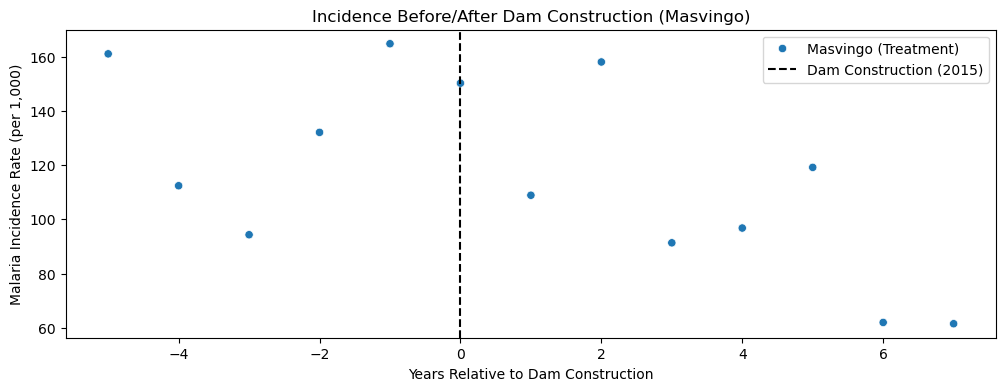

In [95]:
plt.figure(figsize=(12,4))
df_filtered_7141['Name'] = df_filtered_7141['Name'].str.replace('Masvingo', 'Masvingo (Treatment)')
sns.scatterplot(data=df_filtered_7141, x='Year', y='Value', hue='Name')
plt.axvline(0, color='black', linestyle='--', label='Dam Construction (2015)')
plt.title("Incidence Before/After Dam Construction (Masvingo)");
plt.xlabel('Years Relative to Dam Construction')
plt.ylabel('Malaria Incidence Rate (per 1,000)')
plt.legend(title='', loc='upper right')
plt.show()


In [96]:
rdd_df = df_filtered_7141.assign(threshold=(df_filtered_7141["Year"] > 0).astype(int))
model = smf.wls("Value ~ Year * threshold ", rdd_df).fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.523
Model:                            WLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     3.293
Date:                Mon, 20 Jan 2025   Prob (F-statistic):             0.0719
Time:                        11:53:06   Log-Likelihood:                -59.466
No. Observations:                  13   AIC:                             126.9
Df Residuals:                       9   BIC:                             129.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        145.8431     20.407      7.

c:\Users\user\anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


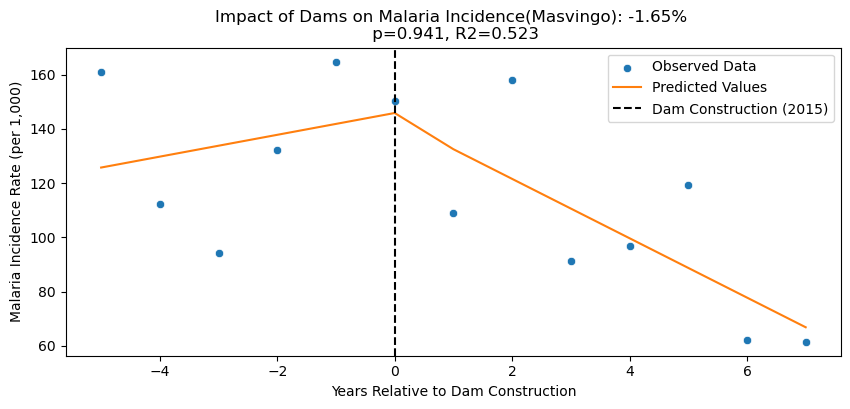

In [97]:
ate_pct = 100*((model.params["threshold"] + model.params["Intercept"])/model.params["Intercept"] - 1)
plt.figure(figsize=(10,4))
ax = sns.scatterplot(data=df_filtered_7141, x='Year', y='Value', label='Observed Data')
df_filtered_7141.assign(predictions=model.fittedvalues).plot(x="Year", y="predictions", ax=ax, color="C1", label='Predicted Values')
plt.axvline(0, color='black', linestyle='--', label='Dam Construction (2015)')
plt.title(f"Impact of Dams on Malaria Incidence(Masvingo): {np.round(ate_pct, 2)}% \n p={np.round(model.pvalues['threshold'], 3)}, R2={np.round(model.rsquared, 3)}")
plt.xlabel('Years Relative to Dam Construction')
plt.ylabel('Malaria Incidence Rate (per 1,000)')
plt.legend(title='')
plt.show()

In [98]:
# Create and process all data for Damid 40188

df_filtered_40188 = df_cases[(df_cases['Name'] == 'Debub') | (df_cases['Name'] == 'Semenawi Keih Bahri')]
# df_filtered = df_filtered_6910[(df_filtered_7141['Year'] >= 2013) & (df_filtered_6909['Year'] <= 2018)]
df_filtered_40188['Treatment'] = df_filtered_40188['Name'].apply(lambda x: 1 if x == 'Debub' else 0)
df_filtered_40188['Post'] = df_filtered_40188['Year'].apply(lambda x: 1 if x >= 2015 else 0)
df_filtered_40188['Treatment_Post'] = df_filtered_40188['Treatment'] * df_filtered_40188['Post']

df_filtered_40188_path = './df_filtered_40188.csv'
df_filtered_40188.to_csv(df_filtered_40188_path, index=False)
print(f"The file has been saved to: {df_filtered_40188_path}")

The file has been saved to: ./df_filtered_40188.csv


C:\Users\user\AppData\Local\Temp\ipykernel_46160\3541251541.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_40188['Treatment'] = df_filtered_40188['Name'].apply(lambda x: 1 if x == 'Debub' else 0)
C:\Users\user\AppData\Local\Temp\ipykernel_46160\3541251541.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_40188['Post'] = df_filtered_40188['Year'].apply(lambda x: 1 if x >= 2015 else 0)
C:\Users\user\AppData\Local\Temp\ipykernel_46160\3541251541.py:7: SettingWithCopyWarning: 
A v

In [99]:
#Baseline Mean, SD and T-test Damid 40188

import scipy.stats as stats
pre_data_40188 = df_filtered_40188[df_filtered_40188['Year'] <= 2014]
mean_Debub = pre_data_40188[pre_data_40188['Name'] == 'Debub']['Value'].mean()
mean_Semenawi = pre_data_40188[pre_data_40188['Name'] == 'Semenawi Keih Bahri']['Value'].mean()
std_Debub = pre_data_40188[pre_data_40188['Name'] == 'Debub']['Value'].std()
std_Semenawi = pre_data_40188[pre_data_40188['Name'] == 'Semenawi Keih Bahri']['Value'].std()
print(f"Debub Baseline Mean: {mean_Debub:.2f}, SD: {std_Debub:.2f}")
print(f"Semenawi Keih Bahri Baseline Mean: {mean_Semenawi:.2f}, SD: {std_Semenawi:.2f}")
t_stat, p_value = stats.ttest_ind(
 pre_data_40188[pre_data_40188['Name'] == 'Debub']['Value'],
 pre_data_40188[pre_data_40188['Name'] == 'Semenawi Keih Bahri']['Value']
)
print(f"t-Statistic: {t_stat:.2f}, p-value: {p_value:.3f}")

Debub Baseline Mean: 10.11, SD: 5.23
Semenawi Keih Bahri Baseline Mean: 8.38, SD: 3.69
t-Statistic: 0.60, p-value: 0.562


In [100]:
#DID Damid 40188:
import statsmodels.formula.api as smf
model_40188 = smf.ols('Value ~ Treatment + Post + Treatment_Post', data=df_filtered_40188).fit()
print(model_40188.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     1.831
Date:                Mon, 20 Jan 2025   Prob (F-statistic):              0.171
Time:                        11:53:23   Log-Likelihood:                -80.777
No. Observations:                  26   AIC:                             169.6
Df Residuals:                      22   BIC:                             174.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.3765      2.629      3.

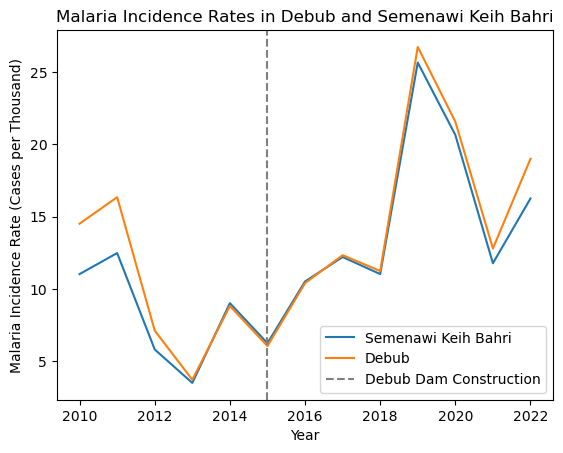

In [101]:
# Visualise Damid 40188
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=df_filtered_40188, x='Year', y='Value', hue='Name', marker='')
plt.axvline(2015, color='gray', linestyle='--', label='Debub Dam Construction')
plt.title('Malaria Incidence Rates in Debub and Semenawi Keih Bahri')
plt.xlabel('Year')
plt.ylabel('Malaria Incidence Rate (Cases per Thousand)')
plt.legend(title='')
plt.show()

# 40188 data analysis:
Debub v.s Semenawi Keih Bahri

Debub Baseline Mean: 10.11, SD: 5.23


Semenawi Keih Bahri Baseline Mean: 8.38, SD: 3.69


t-Statistic: 0.60, p-value: 0.562


Baseline: No significant difference (p = 0.562).

DID Effect: Treatment_Post coefficient (-1.0103, p = 0.833) is not statistically significant.

Conclusion: No significant impact of the dam on malaria incidence rates in Debub   
compared to Semenawi Keih Bahri.

In [102]:
# model table summary Damid 40188

models=[] # create empty list to store the models
names=[] # create empty list to store the names of the models

for year_diff in range(1,10): 
    did=df_cases[(df_cases['Year'] >= (2015-year_diff)) & (df_cases['Year']<=(2015+year_diff))\
                  & df_cases['Name'].isin(['Debub', 'Semenawi Keih Bahri'])] # subset the data within the window of interest around 2015
    did['post']=np.where(did['Year']>=2015,1,0) # create a dummy variable indicating the period after the minimum wage increase
    did['treatment']=np.where(did['Name']=='Debub',1,0) # create a dummy variable for treatment
    did['post_treatment']=did['post']*did['treatment'] # create an interaction term between the post and treatment variables
    did_model = smf.ols('Value ~ post + treatment + post_treatment', did).fit() # run the difference in difference model

    models.append(did_model) # append the model to the list of models
    names.append('± '+str(year_diff)+' Year') # append the name of the model to the list of names

table= summary_col( # create a regression table
    models, # pass the models to the summary_col function
    stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
    float_format='%0.3f', # set the decimal places to 3
    model_names=names, # set the names of the model
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))}) # add the number of observations to the table

print(table) # print the table


               ± 1 Year ± 2 Year ± 3 Year ± 4 Year ± 5 Year ± 6 Year ± 7 Year ± 8 Year ± 9 Year
-----------------------------------------------------------------------------------------------
Intercept      9.023*   6.269**  6.122*** 7.712**  8.376*** 8.376*** 8.376*** 8.376*** 8.376***
               (3.042)  (2.374)  (1.546)  (3.253)  (2.846)  (2.716)  (2.629)  (2.629)  (2.629) 
post           -0.632   3.396    3.885*   5.421    6.009    5.637    5.917*   5.917*   5.917*  
               (3.726)  (3.065)  (2.045)  (4.365)  (3.853)  (3.557)  (3.352)  (3.352)  (3.352) 
treatment      -0.197   0.010    0.440    1.294    1.732    1.732    1.732    1.732    1.732   
               (4.302)  (3.357)  (2.186)  (4.601)  (4.025)  (3.842)  (3.718)  (3.718)  (3.718) 
post_treatment 0.038    -0.074   -0.435   -1.074   -1.396   -1.299   -1.010   -1.010   -1.010  
               (5.269)  (4.334)  (2.891)  (6.173)  (5.449)  (5.030)  (4.740)  (4.740)  (4.740) 
R-squared      0.029    0.286    0.393 

C:\Users\user\AppData\Local\Temp\ipykernel_46160\1067400037.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did['post']=np.where(did['Year']>=2015,1,0) # create a dummy variable indicating the period after the minimum wage increase
C:\Users\user\AppData\Local\Temp\ipykernel_46160\1067400037.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did['treatment']=np.where(did['Name']=='Debub',1,0) # create a dummy variable for treatment
C:\Users\user\AppData\Local\Temp\ipykernel_46160\1067400037.py:11: Sett

In [103]:
df_filtered_40188 = df_filtered_40188[df_filtered_40188['Name'] == 'Debub']
df_filtered_40188["Year"] -= 2015
df_filtered_40188.head()

C:\Users\user\AppData\Local\Temp\ipykernel_46160\517471998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_40188["Year"] -= 2015


,ISO3,National Unit,Name,Admin Level,Metric,Units,Year,Value,Treatment,Post,Treatment_Post
57096,ERI,Eritrea,Debub,admin1,Incidence Rate,Cases per Thousand,-5,14.515858,1,0,0
57097,ERI,Eritrea,Debub,admin1,Incidence Rate,Cases per Thousand,-4,16.342193,1,0,0
57098,ERI,Eritrea,Debub,admin1,Incidence Rate,Cases per Thousand,-3,7.125823,1,0,0
57099,ERI,Eritrea,Debub,admin1,Incidence Rate,Cases per Thousand,-2,3.732508,1,0,0
57100,ERI,Eritrea,Debub,admin1,Incidence Rate,Cases per Thousand,-1,8.826130,1,0,0


C:\Users\user\AppData\Local\Temp\ipykernel_46160\2364320954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_40188['Name'] = df_filtered_40188['Name'].str.replace('Debub', 'Debub (Treatment)')


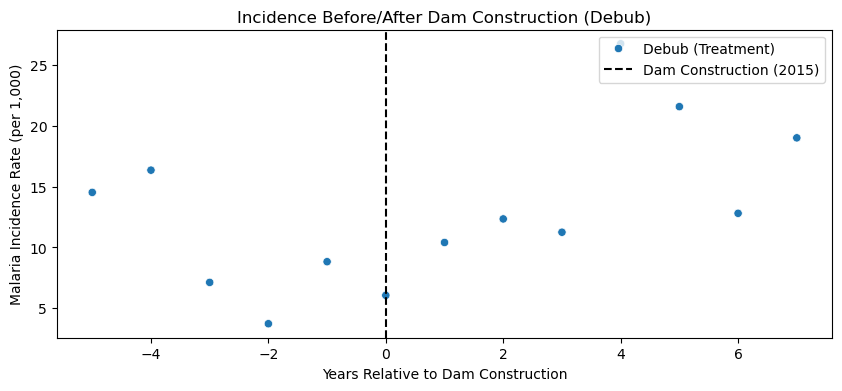

In [104]:
plt.figure(figsize=(10,4))
df_filtered_40188['Name'] = df_filtered_40188['Name'].str.replace('Debub', 'Debub (Treatment)')
sns.scatterplot(data=df_filtered_40188, x='Year', y='Value', hue='Name')
plt.axvline(0, color='black', linestyle='--', label='Dam Construction (2015)')
plt.title("Incidence Before/After Dam Construction (Debub)");
plt.xlabel('Years Relative to Dam Construction')
plt.ylabel('Malaria Incidence Rate (per 1,000)')
plt.legend(title='', loc='upper right')
plt.show()


In [105]:
rdd_df = df_filtered_40188.assign(threshold=(df_filtered_40188["Year"] > 0).astype(int))
model = smf.wls("Value ~ Year * threshold ", rdd_df).fit()
print(model.summary())

                            WLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.527
Model:                            WLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     3.349
Date:                Mon, 20 Jan 2025   Prob (F-statistic):             0.0693
Time:                        11:53:47   Log-Likelihood:                -37.387
No. Observations:                  13   AIC:                             82.77
Df Residuals:                       9   BIC:                             85.03
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.5618      3.734      1.

c:\Users\user\anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


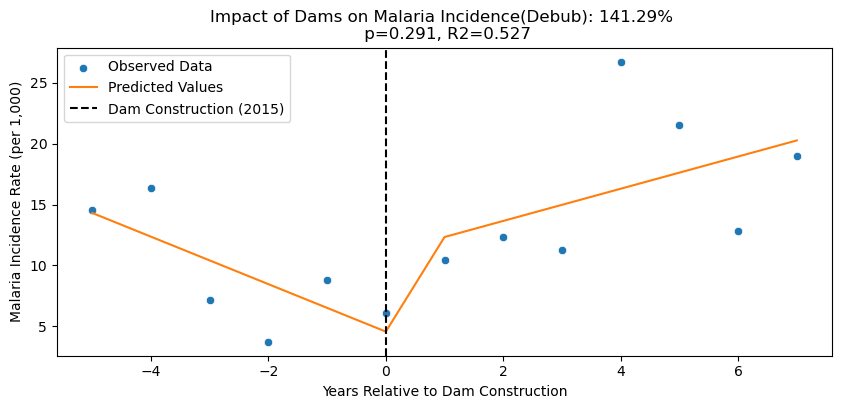

In [106]:
ate_pct = 100*((model.params["threshold"] + model.params["Intercept"])/model.params["Intercept"] - 1)
plt.figure(figsize=(10,4))
ax = sns.scatterplot(data=df_filtered_40188, x='Year', y='Value', label='Observed Data')
df_filtered_40188.assign(predictions=model.fittedvalues).plot(x="Year", y="predictions", ax=ax, color="C1", label='Predicted Values')
plt.axvline(0, color='black', linestyle='--', label='Dam Construction (2015)')
plt.title(f"Impact of Dams on Malaria Incidence(Debub): {np.round(ate_pct, 2)}% \n p={np.round(model.pvalues['threshold'], 3)}, R2={np.round(model.rsquared, 3)}")
plt.xlabel('Years Relative to Dam Construction')
plt.ylabel('Malaria Incidence Rate (per 1,000)')
plt.legend(title='')
plt.show()

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 导入数据
data_path = r'Filtered Dams (UN McGill) 2010-2022 Africa.csv'
data_df = pd.read_csv(data_path)

df_filtered = data_df[(data_df['YEAR_DAM'] >= 2010) & (data_df['YEAR_DAM'] <= 2021)]

df_filtered



,GDW_ID,RES_NAME,DAM_NAME,ALT_NAME,DAM_TYPE,LAKE_CTRL,RIVER,ALT_RIVER,MAIN_BASIN,SUB_BASIN,...,LAT_RIV,LONG_DAM,LAT_DAM,ORIG_SRC,POLY_SRC,GRAND_ID,HYRIV_ID,INSTREAM,HYLAK_ID,HYBAS_L12
0,6861,NaN,Ouldjet Mellegue,Ouldjt Mellegue,Dam,NaN,Mellegue,NaN,NaN,NaN,...,35.977500,NaN,NaN,GRanD,McGill,6878,10004335,Instream,1427721,1.121662e+09
1,6872,NaN,Dikgatlhong,NaN,Dam,NaN,Shashe,Tati,Limpopo,NaN,...,-21.564694,NaN,NaN,GRanD,JRC-GSW,6891,11415033,Instream,1427732,1.121539e+09
2,6895,NaN,Samendeni,NaN,Dam,NaN,Mouhoun,NaN,Black Volta,NaN,...,11.388263,NaN,NaN,GRanD,McGill,6917,10576911,Instream,1427755,1.121935e+09
3,6896,NaN,Soum,NaN,Dam,NaN,Wranko,NaN,Volta,NaN,...,12.597743,NaN,NaN,GRanD,JRC-GSW,6918,10536204,Instream,1427756,1.121917e+09
4,6904,NaN,Imboulou,NaN,Dam,NaN,Lefini,NaN,Congo,NaN,...,-2.935546,NaN,NaN,GRanD,JRC-GSW-mod,6933,11078190,Instream,1427764,1.121209e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,41033,NaN,NaN,NaN,Dam,NaN,NaN,NaN,NaN,NaN,...,-29.743810,NaN,NaN,JRC-GSW,JRC-GSW,0,11502289,Instream,1434044,1.122290e+09
70,41034,NaN,NaN,NaN,Dam,NaN,NaN,NaN,NaN,NaN,...,-29.728842,NaN,NaN,JRC-GSW,JRC-GSW,0,11502107,Offstream,1434045,1.122290e+09
71,41035,NaN,NaN,NaN,Dam,NaN,NaN,NaN,NaN,NaN,...,-29.651161,NaN,NaN,JRC-GSW,JRC-GSW,0,11501708,Instream,1434046,1.122290e+09
72,41050,NaN,NaN,NaN,Dam,NaN,NaN,NaN,NaN,NaN,...,-29.334574,NaN,NaN,JRC-GSW,JRC-GSW,0,11499360,Instream,1434048,1.122289e+09


In [47]:
df_filtered[['DAM_HGT', 'DAM_LEN', 'AREA_SKM', 'DEPTH', 'CATCH_SKM']] = df_filtered[['DAM_HGT_M', 'DAM_LEN_M', 'AREA_SKM', 'DEPTH_M', 'CATCH_SKM']]
df_result = df_filtered[['DAM_HGT', 'DAM_LEN', 'AREA_SKM', 'DEPTH', 'CATCH_SKM']]

df_result

,DAM_HGT,DAM_LEN,AREA_SKM,DEPTH,CATCH_SKM
0,51,900,4.077,38.0,4390
1,41,4600,41.656,9.6,7691
2,23,2760,132.923,7.9,4234
3,24,1600,29.402,6.9,1575
4,32,580,98.184,5.9,14834
...,...,...,...,...,...
69,-99,-99,1.042,15.7,136
70,-99,-99,0.153,13.7,5
71,-99,-99,0.163,14.1,22
72,-99,-99,2.177,16.4,272


In [48]:
summary = df_result.describe().round(2)  # generate summary statistics, and round everything to 2 decimal degrees
summary = summary.T #.T transposes the table (rows become columns and vice versa)
summary

,count,mean,std,min,25%,50%,75%,max
DAM_HGT,74.0,-24.36,95.87,-99.0,-99.00,-99.00,73.25,243.0
DAM_LEN,74.0,336.61,763.98,-99.0,-99.00,-99.00,564.50,4600.0
AREA_SKM,74.0,61.85,227.65,0.1,0.94,3.55,23.76,1874.0
DEPTH,74.0,32.37,72.43,1.3,14.83,16.35,24.85,603.5
CATCH_SKM,74.0,11102.30,29653.81,1.0,69.00,428.50,5774.50,174830.0
